### K-Means聚类算法

K-Means算法的伪代码如下所示:

    创建k个点作为起始质心(经常是随机选择)
    当任意一个点的簇分配结果发生改变时
        对数据集中的每个数据点
            对每个质心
                计算质心与数据点之间的距离
            将数据点分配到距其最近的簇
        对每一个簇，计算簇中所有点的均值并将其均值作为质心
        

In [1]:
import kMeans

In [2]:
from numpy import *

In [3]:
dataMat = mat(kMeans.loadDataSet('testSet.txt'))

In [4]:
min(dataMat[:,0])

matrix([[-5.379713]])

In [5]:
min(dataMat[:,1])

matrix([[-4.232586]])

In [6]:
max(dataMat[:,1])

matrix([[ 5.1904]])

In [7]:
max(dataMat[:,0])

matrix([[ 4.838138]])

In [8]:
kMeans.randCent(dataMat, 2)

matrix([[ 1.0720982 ,  0.98540353],
        [ 1.03571702, -1.62238603]])

In [9]:
kMeans.distEclud(dataMat[0], dataMat[1])

5.184632816681332

In [10]:
reload(kMeans) #注意在写kMeans的时候，重新计算centroid的循环与计算每个点最近质心的循环平级，而不是嵌套(即注意缩进)

<module 'kMeans' from 'kMeans.pyc'>

In [11]:
dataMat = mat(kMeans.loadDataSet('testSet.txt'))

m = 80


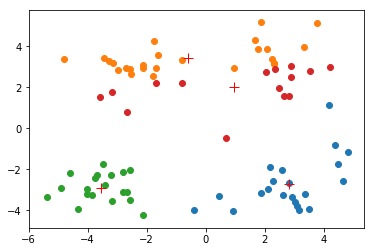

[[ 2.81706052 -2.71370657]
 [-0.59512872  3.44969212]
 [-3.53973889 -2.89384326]
 [ 0.97906193  2.00484353]]


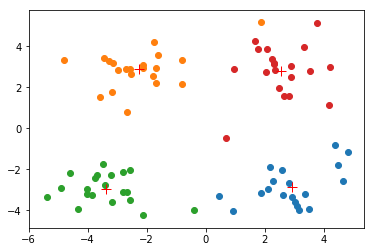

[[ 2.91339042 -2.85004268]
 [-2.25437281  2.90180529]
 [-3.38237045 -2.9473363 ]
 [ 2.56728815  2.8251861 ]]


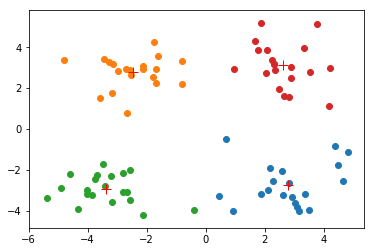

[[ 2.80293085 -2.7315146 ]
 [-2.46154315  2.78737555]
 [-3.38237045 -2.9473363 ]
 [ 2.6265299   3.10868015]]


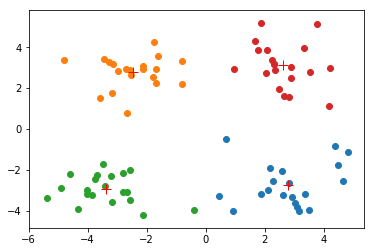

[[ 2.80293085 -2.7315146 ]
 [-2.46154315  2.78737555]
 [-3.38237045 -2.9473363 ]
 [ 2.6265299   3.10868015]]
numIt = 4


In [12]:
myCentroids, clustAssing = kMeans.kMeans(dataMat, 4)

In [13]:
print shape(dataMat)

(80, 2)


In [14]:
print shape(dataMat[:,0].flatten())

(1, 80)


In [15]:
dataMat[:,0].flatten().A[0]

array([ 1.658985, -3.453687,  4.838138, -5.379713,  0.972564, -3.567919,
        0.450614, -3.487105,  2.668759, -3.156485,  3.165506, -2.786837,
        4.208187, -2.123337,  0.704199, -0.39237 ,  2.831667, -0.790153,
        2.943496, -3.195883,  2.336445, -1.786345,  2.190101, -3.403367,
        1.778124, -1.688346,  2.592976, -4.007257,  2.257734, -2.679011,
        0.939512, -3.674424,  2.046259, -3.18947 ,  4.372646, -2.579316,
        1.889034, -0.798747,  2.83652 , -3.837877,  2.096701, -2.709034,
        3.367037, -2.121479,  2.329546, -3.284816,  3.091414, -3.762093,
        3.542056, -1.736822,  2.127073, -4.323818,  3.792121, -4.786473,
        2.624081, -4.009299,  2.493525, -2.513661,  1.864375, -3.171184,
        2.89422 , -2.562539,  3.491078, -2.565729,  3.332948, -1.616805,
        2.280615, -2.651229,  2.321395, -1.685703,  3.031012, -4.599622,
        4.196223, -2.133863,  4.668892, -2.793241,  2.884105, -2.967647,
        4.479332, -4.905566])

In [16]:
myCentroids

matrix([[ 2.80293085, -2.7315146 ],
        [-2.46154315,  2.78737555],
        [-3.38237045, -2.9473363 ],
        [ 2.6265299 ,  3.10868015]])

In [17]:
myCentroids[:,0].flatten().A[0]

array([ 2.80293085, -2.46154315, -3.38237045,  2.6265299 ])

In [18]:
myCentroids[:,1].flatten().A[0]

array([-2.7315146 ,  2.78737555, -2.9473363 ,  3.10868015])

### 使用后处理提高聚类性能

K-Means算法会收敛，但聚类效果也可能会较差。原因是K-Means算法收敛到了局部最小值，而非全局最小值。  
一种用于度量聚类效果的指标是SSE(Sum of Squared Error, 误差平方和)，对应代码kMeans.py中kMeans函数的clusterAssment矩阵的第二列之和。  
SSE值越小表示数据点越接近它们的质心，聚类效果也越好。因为对误差取了平方，所以更重视那些远离中心的点。  
一种肯定能降低SSE的方法是增加簇的个数，但这会违背聚类的目标。聚类的目标是**在保持簇数目不变的情况下提高簇的质量**。  

对于K-Means算法陷入局部最小值的情况，有以下的改进方法。可以对生成的簇进行后处理，**将具有最大SSE值的簇划分成两个簇**。(具体实现时可以将最大簇包含的点过滤出来，然后再上面继续运行K-Means，k值取2)

为保持簇总数不变，我们可以合并两个簇。有两种可以量化的方法：**合并最近的质心**，或者**合并两个使得SSE增幅最小的质心**。第一种方法通过计算所有质心之间的距离，然后合并距离最近的两个点来实现。第二种方法需要合并两个簇然后计算总的SSE值，但这种方法需要尝试所有可能的两个簇，不断重复该处理过程，直到找到合并最佳的两个簇为止。

###  二分K-Means算法

该算法的提出是为了改进K-Means算法。  
该算法首先将所有点作为一个簇，然后将该簇一分为二。之后选择其中一个簇继续进行划分，选择哪一个簇进行划分取决于对其划分是否可以最大程度降低SSE的值。上述基于SSE的划分过程不断重复，直到得到用户指定的簇数目为止。另一种做法是选择SSE最大的簇进行划分，直到簇数目达到用户指定的数目为止。

二分K-Means算法的伪代码如下：

    将所有点看成一个簇
    当簇数目小于k时
    对于每一个簇
        计算总误差
        在给定的簇上面进行K-Means聚类(k=2)
        计算该簇一分为二之后的总误差
    选择使得误差最小的那个簇进行划分操作

In [19]:
reload(kMeans)

<module 'kMeans' from 'kMeans.pyc'>

In [20]:
dataMat3 = mat(kMeans.loadDataSet('testSet2.txt'))

centList: [[-0.15772275000000002, 1.2253301166666664]]
-------------------
m = 60
[[-2.71560067  3.37937762]
 [ 1.21959613  0.06545838]]
[[-2.94737575  3.3263781 ]
 [ 1.23710375  0.17480612]]
[[-2.94737575  3.3263781 ]
 [ 1.23710375  0.17480612]]
numIt = 3
sseSplit, and notSplit:  570.722757425 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  60
[matrix([[-2.94737575,  3.3263781 ]]), matrix([[ 1.23710375,  0.17480612]])]
-------------------
m = 20
[[-3.5939405   1.451088  ]
 [-2.87553522  3.53474367]]
[[-3.5939405   1.451088  ]
 [-2.87553522  3.53474367]]
numIt = 2
sseSplit, and notSplit:  29.319041891 532.659806789
m = 40
[[-0.45965615 -2.7782156 ]
 [ 2.93386365  3.12782785]]
[[-0.45965615 -2.7782156 ]
 [ 2.93386365  3.12782785]]
numIt = 2
sseSplit, and notSplit:  68.6865481262 38.0629506357
the bestCentToSplit is:  1
the len of bestClustAss is:  40
[matrix([[-2.94737575,  3.3263781 ]]), matrix([[-0.45965615, -2.7782156 ]]), matrix([[ 2.93386365,  3.12782785]])]


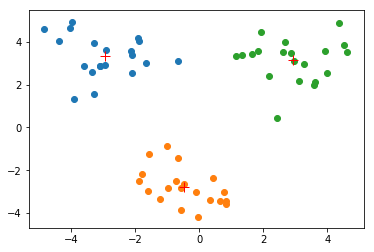

In [21]:
centList, myNewAssments = kMeans.biKmeans(dataMat3, 3)

In [22]:
centList

[matrix([[-2.94737575,  3.3263781 ]]),
 matrix([[-0.45965615, -2.7782156 ]]),
 matrix([[ 2.93386365,  3.12782785]])]

In [23]:
centList[0][:,0]

matrix([[-2.94737575]])